# 04.09 - Text and Annotation

Especially for less intuitive plots, text and annotation are a feature for a clear visualization. Let's explore how Matplotlib handle them.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

### Example: Effect of Holidays on US Births

Let's return to one of our previously used datasets and try to visualize how US holidays affect birth dates:

In [2]:
births = pd.read_csv('../data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

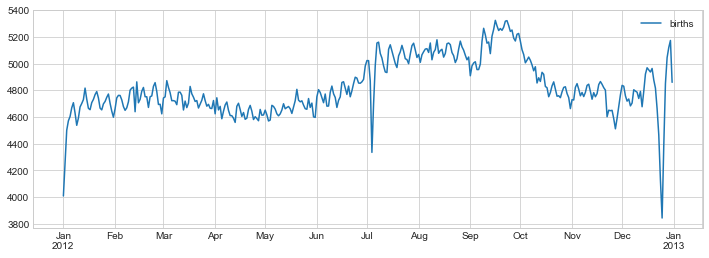

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

We can now annotate this plot manually using the <code>plt.text</code> / <code>ax.text</code> command:

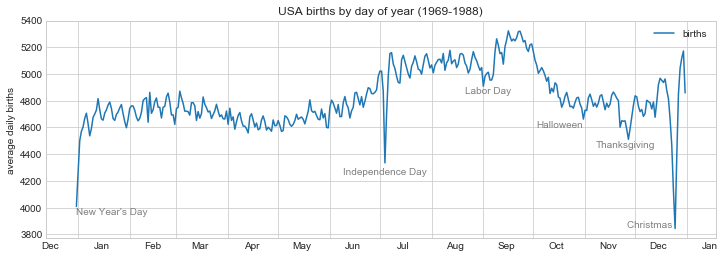

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

### Transforms and Text Position

In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the transform.

There are three pre-defined transforms that can be useful in this situation:

1. <code>ax.transData</code>: Transform associated with data coordinates

2. <code>ax.transAxes</code>: Transform associated with the axes (in units of axes dimensions)

3. <code>fig.transFigure</code>: Transform associated with the figure (in units of figure dimensions)

Now let's use these transforms to draw text in different locations:

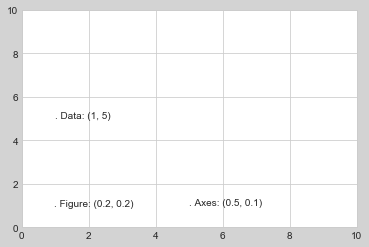

In [5]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Some notes:

1. <code>transData</code> coordinates give the usual data coordinates associated with the x- and y-axis labels;

2. <code>transAxes</code> coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size;

3. <code>transFigure</code> coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size

### Arrows and Annotation

The suggested method is using <code>plt.annotate()</code> insted of the standard <code>plt.arrow()</code>:

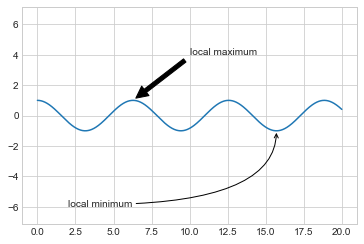

In [6]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the <code>arrowprops</code> dictionary, which has numerous options available. 